# Latar Belakang

Latar Belakang

Tahun 2025 menjadi momentum penting bagi kebangkitan pariwisata Thailand, di mana Bangkok kembali menegaskan posisinya sebagai destinasi wisata global utama. Setelah mencatat lebih dari 35 juta kunjungan wisatawan internasional pada 2024, pemerintah Thailand menargetkan peningkatan hingga 36–39 juta kunjungan pada 2025 melalui program Amazing Thailand Grand Tourism and Sports Year 2025. Kondisi ini membuka peluang signifikan bagi Airbnb untuk memperluas pangsa pasar akomodasi berbasis komunitas di Bangkok. Namun, dengan pertumbuhan pesat ini muncul pertanyaan: apakah distribusi listing Airbnb di Bangkok sudah merata dan sesuai dengan pola permintaan wisatawan?.

Sebagai seorang Data Analyst di Airbnb, peran saya adalah memberikan wawasan berbasis data kepada tim internal mengenai kondisi supply dan demand Airbnb di Bangkok. Analisis ini diharapkan mampu mendukung strategi ekspansi, optimalisasi listing, serta menjaga daya saing Airbnb di tengah meningkatnya kompetisi di sektor akomodasi pariwisata.

Stakeholder

1. Airbnb Business Development & Expansion – menggunakan hasil analisis untuk menentukan prioritas area akuisisi host baru.

2. Airbnb Marketing Strategy Team – memanfaatkan wawasan distribusi listing untuk merancang kampanye promosi yang lebih efektif.

3. Airbnb Product & Data Strategy Team – menerapkan insight distribusi supply-demand ke dalam pengembangan fitur seperti rekomendasi host, dynamic pricing, dan optimasi lokasi.

Rumusan Masalah

1. Bagaimana peta distribusi listing Airbnb di Bangkok berdasarkan zona kota (Inner City, Middle City, Outer City) maupun neighbourhood?

2. Bagaimana distribusi listing berdasarkan tipe room di Bangkok, dan apakah preferensi tersebut berbeda antar zona kota?

3. Room_type mana yang mendominasi jumlah review sebagai indikasi permintaan tinggi?

4. Area mana yang memiliki potensi pertumbuhan, misalnya:

    + Wilayah dengan banyak listing tetapi sedikit review (indikasi oversupply).

    + Wilayah dengan sedikit listing tetapi review tinggi (indikasi opportunity).

Tujuan Analisis

Melalui analisis ini diharapkan dapat:

1. Memberikan gambaran menyeluruh mengenai distribusi listing Airbnb di Bangkok berdasarkan zona kota (Inner City, Middle City, Outer City) maupun neighbourhood.

2. Mengidentifikasi preferensi tipe room di Bangkok serta perbedaannya antar zona kota.

3. Menilai tingkat permintaan berdasarkan jumlah review untuk masing-masing room_type dan area.

4. Menemukan wilayah dengan potensi pertumbuhan, baik berupa oversupply (banyak listing tapi sedikit review) maupun opportunity (sedikit listing tapi permintaan tinggi).

5. Mendukung tim bisnis dan pemasaran Airbnb dalam menyusun strategi berbasis data untuk meningkatkan penetrasi pasar dan daya saing di Bangkok.

# Data

Importing Libraries and Dataset
+ Dataset:
  1. id : Identitas unik Airbnb untuk tempat tersebut.
  2. name : Nama yang dari properti
  3. host_id : Pengidentifikasi unik Airbnb untuk tuan rumah/pengguna.
  4. host_name : Nama tuan rumah
  5. neighbourhood : mengenai lingkungan (neighborhood) di mana properti tersebut terletak.
  6. latitude : Menggunakan proyeksi Sistem Geodesi Dunia (WGS84) untuk lintang dan bujur.
  7. longitude : Menggunakan proyeksi Sistem Geodesi Dunia (WGS84) untuk lintang dan bujur.
  8. room_type : tipe kamar yang disediakan
  9. price : Harga harian untuk menyewa properti, dinyatakan dalam mata uang lokal (bath).
  10. minimum_nights : Jumlah minimum malam yang harus diinap oleh penyewa untuk properti tersebut.
  11. number_of_reviews : Jumlah ulasan yang diterima oleh properti tersebut
  12. last_review : tanggal terakhir review
  13. calculated_host_listings_count : jumlah properti yang dimiliki oleh tuan rumah pada saat pengambilan data terbaru di suatu kota atau wilayah geografis.
  14. availability_365 : Ketersediaan properti selama 365 hari. Ini menunjukkan berapa banyak hari properti tersebut tersedia untuk disewa dalam satu tahun.
  15. number_of_reviews_ltm : Jumlah ulasan yang diterima oleh properti dalam 12 bulan terakhir (dalam 12 bulan terakhir).

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import matplotlib.pylab as plt

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# Read Data

Ambil data Airbnb Listing Bangkoknya

In [ ]:
df = pd.read_csv('Airbnb Listings Bangkok.csv')
df.head()

Unnamed: 0      id                                            name  \
0           0   27934                 Nice room with superb city view   
1           1   27979                  Easy going landlord,easy place   
2           2   28745               modern-style apartment in Bangkok   
3           3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   
4           4  941865                      Suite Room 3 at MetroPoint   

   host_id   host_name neighbourhood  latitude  longitude        room_type  \
0   120437      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   
1   120541         Emy       Bang Na  13.66818  100.61674     Private room   
2   123784  Familyroom     Bang Kapi  13.75232  100.62402     Private room   
3   153730     Sirilak     Din Daeng  13.78823  100.57256     Private room   
4   610315       Kasem     Bang Kapi  13.76872  100.63338     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0   1905               3                 65  2020-01-06               0.50   
1   1316               1                  0         NaN                NaN   
2    800              60                  0         NaN                NaN   
3   1286               7                  2  2022-04-01               0.03   
4   1905               1                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               2               353                      0  
1                               2               358                      0  
2                               1               365                      0  
3                               1               323                      1  
4                               3               365                      0

Cek info tentang dataset Airbnb

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

dari info yang diperoleh dapat di ketahui bahwa:
1. kolom name, host_name, last_review, dan review_per_month punya null values
2. kolom host_id berupa integer (int64) seharusnya tipenya object
3. kolom last_review atau tanggal review terakhir harusnya berupa datetime tapi masih bertipe object

Statistika Deskriptif

gambaran numerik awal

In [ ]:
print("\nRingkasan statistik deskriptif:")
display(df.describe(include="all").T)


Ringkasan statistik deskriptif:


count unique  \
Unnamed: 0                      15854.0    NaN   
id                              15854.0    NaN   
name                              15846  14794   
host_id                         15854.0    NaN   
host_name                         15853   5312   
neighbourhood                     15854     50   
latitude                        15854.0    NaN   
longitude                       15854.0    NaN   
room_type                         15854      4   
price                           15854.0    NaN   
minimum_nights                  15854.0    NaN   
number_of_reviews               15854.0    NaN   
last_review                       10064   1669   
reviews_per_month               10064.0    NaN   
calculated_host_listings_count  15854.0    NaN   
availability_365                15854.0    NaN   
number_of_reviews_ltm           15854.0    NaN   

                                                                             top  \
Unnamed: 0                                                                   NaN   
id                                                                           NaN   
name                            New!  La Chada Night Market studio 2PPL near MRT   
host_id                                                                      NaN   
host_name                                                                  Curry   
neighbourhood                                                            Vadhana   
latitude                                                                     NaN   
longitude                                                                    NaN   
room_type                                                        Entire home/apt   
price                                                                        NaN   
minimum_nights                                                               NaN   
number_of_reviews                                                            NaN   
last_review                                                           2022-12-11   
reviews_per_month                                                            NaN   
calculated_host_listings_count                                               NaN   
availability_365                                                             NaN   
number_of_reviews_ltm                                                        NaN   

                                freq                  mean  \
Unnamed: 0                       NaN                7926.5   
id                               NaN  157939679701701248.0   
name                              45                   NaN   
host_id                          NaN      154105783.575817   
host_name                        228                   NaN   
neighbourhood                   2153                   NaN   
latitude                         NaN             13.745144   
longitude                        NaN            100.559903   
room_type                       8912                   NaN   
price                            NaN           3217.703923   
minimum_nights                   NaN             15.292355   
number_of_reviews                NaN             16.654157   
last_review                      189                   NaN   
reviews_per_month                NaN              0.813145   
calculated_host_listings_count   NaN             13.889618   
availability_365                 NaN            244.378643   
number_of_reviews_ltm            NaN              3.481519   

                                                 std        min         25%  \
Unnamed: 0                               4576.799919        0.0     3963.25   
id                              294601541771321472.0    27934.0  21045091.5   
name                                             NaN        NaN         NaN   
host_id                             131872648.110098    58920.0  39744308.0   
host_name                                        NaN        NaN         NaN   
neighbourhood                

dari ringkasan deskriptif di dapatkan bahwa:
1. Terdapat anomali pada kolom price yaitu nilai minimum 0 dan nilai maximum yang terlalu tinggi yaitu 1100000.
2. Terdapat anomali minimum_nights pada nilai max yaitu 1125
3. host_name yang paling banyak memiliki listing adalah Curry yaitu sebanyak 228
Entire home/apt merupakan tipe ruangan terbanyak yaitu sebesar 8.912

Unique Values per Column

In [ ]:
print("\nJumlah unique values per kolom:")
for col in df.columns:
    print(f"{col:25} --> {df[col].nunique()} unique")


Jumlah unique values per kolom:
Unnamed: 0                --> 15854 unique
id                        --> 15854 unique
name                      --> 14794 unique
host_id                   --> 6659 unique
host_name                 --> 5312 unique
neighbourhood             --> 50 unique
latitude                  --> 9606 unique
longitude                 --> 10224 unique
room_type                 --> 4 unique
price                     --> 3040 unique
minimum_nights            --> 86 unique
number_of_reviews         --> 298 unique
last_review               --> 1669 unique
reviews_per_month         --> 513 unique
calculated_host_listings_count --> 50 unique
availability_365          --> 366 unique
number_of_reviews_ltm     --> 85 unique


In [ ]:
print("\nContoh unique values per kolom:")
for col in df.columns:
    contoh = df[col].unique()[:5]
    print(f"{col:25} : {contoh}")


Contoh unique values per kolom:
Unnamed: 0                : [0 1 2 3 4]
id                        : [ 27934  27979  28745  35780 941865]
name                      : ['Nice room with superb city view' 'Easy going landlord,easy place'
 'modern-style apartment in Bangkok'
 'Spacious one bedroom at The Kris Condo Bldg. 3'
 'Suite Room 3 at MetroPoint']
host_id                   : [120437 120541 123784 153730 610315]
host_name                 : ['Nuttee' 'Emy' 'Familyroom' 'Sirilak' 'Kasem']
neighbourhood             : ['Ratchathewi' 'Bang Na' 'Bang Kapi' 'Din Daeng' 'Bang Kho laen']
latitude                  : [13.75983 13.66818 13.75232 13.78823 13.76872]
longitude                 : [100.54134 100.61674 100.62402 100.57256 100.63338]
room_type                 : ['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']
price                     : [1905 1316  800 1286 1000]
minimum_nights            : [  3   1  60   7 250]
number_of_reviews         : [65  0  2 19  1]
last_review       

dari info unique value ini dapat diketahui bahwa:
1. Terdapat 17 kolom pada dataset airbnb listing bangkok (termasuk unnamed 0 untuk saat ini)
2. Terdapat 4 jenis tipe ruangan untuk airbnb listing bangkok (room_type)
3. terdapat nan values pada review_per_month dan last_review yang berarti pada listing tersebut ada yang tidak memiliki review dari customer

Missing Values

In [ ]:
missing_info = df.isnull().sum()
missing_pct = (missing_info / len(df)) * 100

missing_df = pd.DataFrame({
    "Total Missing": missing_info,
    "Persentase (%)": missing_pct
}).sort_values(by="Total Missing", ascending=False)

print("\nCek missing values:")
display(missing_df[missing_df["Total Missing"] > 0])


Cek missing values:


Total Missing  Persentase (%)
reviews_per_month           5790       36.520752
last_review                 5790       36.520752
name                           8        0.050460
host_name                      1        0.006308

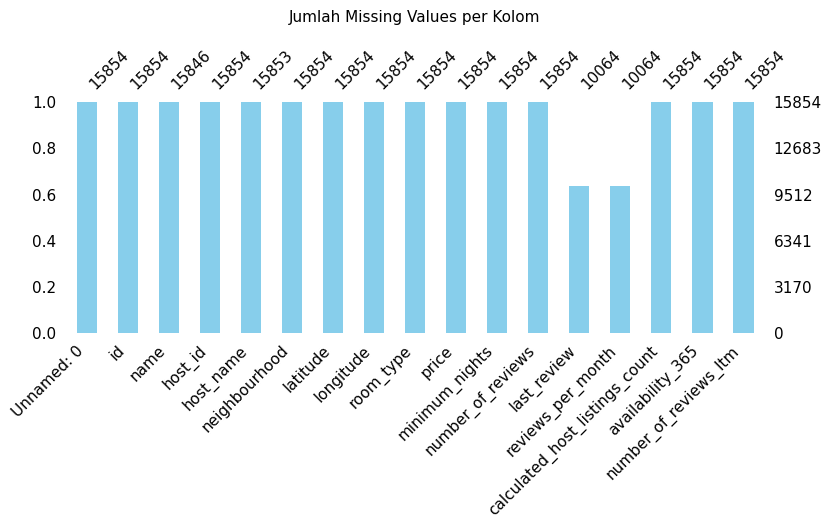

In [ ]:
# cek persebaran data missing value
msno.bar(df, figsize=(9, 3), fontsize=11, color='skyblue')
plt.title('Jumlah Missing Values per Kolom\n', fontsize=11, loc='center')
plt.show()

# Data Cleaning/Data Preparation

In [ ]:
#Copy data awal untuk dilakukan cleaning
data_clean=df.copy()

Handling/Treatment untuk Data Type Error

In [ ]:
#Mengubah tipe data kolom 'host_id' menjadi objek
data_clean['host_id'] = data_clean['host_id'].astype(str)

In [ ]:
# Mengubah tipe data kolom 'id' menjadi objek
data_clean['id'] = data_clean['id'].astype(str)

In [ ]:
# Melakukan uji Wilcoxon Signed-Rank
# H0: Median sampel sama dengan 0
# Ha: Median sampel tidak sama dengan 0
statistic, p_value = stats.wilcoxon(data_clean['price'] - 0)

# Interpretasikan hasil uji
alpha = 0.05
print("Wilcoxon Signed-Rank Test:")
print("Statistic:", statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Kesimpulan: Terdapat cukup bukti untuk menolak hipotesis nol. Median sampel tidak sama dengan 0.")
else:
    print("Kesimpulan: Tidak cukup bukti untuk menolak hipotesis nol. Median sampel sama dengan 0.")

Wilcoxon Signed-Rank Test:
Statistic: 0.0
p-value: 0.0
Kesimpulan: Terdapat cukup bukti untuk menolak hipotesis nol. Median sampel tidak sama dengan 0.


Handling/Treatment Zero Value/Missing Value

In [ ]:
#Handling Price = 0 dengan median price
data_clean['price'] = data_clean['price'].replace(0, data_clean[data_clean['price'] != 0]['price'].median())

In [ ]:
# mengisi deskripsi kosong pada 'name' dengan text: 'No description'
data_clean.name = data_clean.name.fillna('no description')

# mengisi deskripsi kosong pada 'reviews_per_month' dengan 0
data_clean.fillna({'reviews_per_month':0}, inplace=True)

data_clean.sample(5)

Unnamed: 0        id                                            name  \
2926         2926  17387066           Brand new apartment near Aree station   
1244         1244   8452748                 WYNE Condo-1BR-BTS Phra Khanong   
1870         1870  12256904             Cozy Room and Near to BTS Sky Train   
11735       11735  51675314       ❤逛街方便❤曼谷市中心Asok站旁※近T21商场※无边泳池※韩国城※可做饭-742   
10461       10461  42561184  Somerset Ekamai Bangkok, Studio Executive King   

         host_id host_name neighbourhood  latitude  longitude  \
2926   117229635    Alisra    Phaya Thai  13.77900  100.54426   
1244    44495909       Nui   Khlong Toei  13.71240  100.59290   
1870    66002057   Janjira  Phra Khanong  13.69900  100.60756   
11735   66923696     Panda   Khlong Toei  13.73745  100.55741   
10461  378750814     Rohan       Vadhana  13.72277  100.58548   

             room_type  price  minimum_nights  number_of_reviews last_review  \
2926      Private room   2850               3                  0         NaN   
1244      Private room    600              90                  0         NaN   
1870   Entire home/apt   1300               2                  1  2016-04-14   
11735  Entire home/apt   3500               1                  2  2022-06-02   
10461  Entire home/apt   4986               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
2926                0.00                               1                90   
1244                0.00                               1               365   
1870                0.01                               2               347   
11735               0.27                              48               177   
10461               0.00                              21               362   

       number_of_reviews_ltm  
2926                       0  
1244                       0  
1870                       0  
11735                      2  
10461                      0

Droping kolom unnamed karena hanya perulangan index saja

In [ ]:
data_clean.drop('Unnamed: 0',axis=1,inplace=True)

# Outliers pada Price & Minimum Nights

Bagian Price/Harga

In [ ]:
# cari outliers dari variable price
q1_price = data_clean.price.quantile(.25)
q3_price = data_clean.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR of the variable price: ', IQR_price)

# atur limit
upper_bound = q3_price + 1.5 * IQR_price
lower_bound = q1_price - 1.5 * IQR_price

print('Upper limit of price: ', upper_bound)
print('Lower limit of price: ', lower_bound)

IQR of the variable price:  1529.0
Upper limit of price:  4722.5
Lower limit of price:  -1393.5


Output ini menunjukkan batas atas harga (upper_bound) sekitar 4722.5 setelah menggunakan metode IQR pertama. Artinya, listing dengan harga di atas nilai ini dianggap sebagai outlier awal.

Mencari outlier dari outlier (outlier of outliers) perlu dilakukan karena mungkin saja outlier pertama ini masih mencakup nilai-nilai yang, meskipun tinggi, masih dalam rentang harga yang wajar untuk properti mewah atau eksklusif. Dengan menganalisis outlier dari outlier, saya berusaha mengidentifikasi nilai-nilai yang benar-benar ekstrem dan kemungkinan merupakan data error atau anomali yang signifikan, sehingga pembersihan data menjadi lebih akurat dan tidak menghilangkan listing premium yang valid.



In [ ]:
#dataframe untuk outilers
df_outliers=data_clean[(data_clean['price'] < lower_bound) | (data_clean['price'] > upper_bound)]
df_outliers['price'] = df_outliers['price'].astype(float)

Text(0, 0.5, 'Harga')

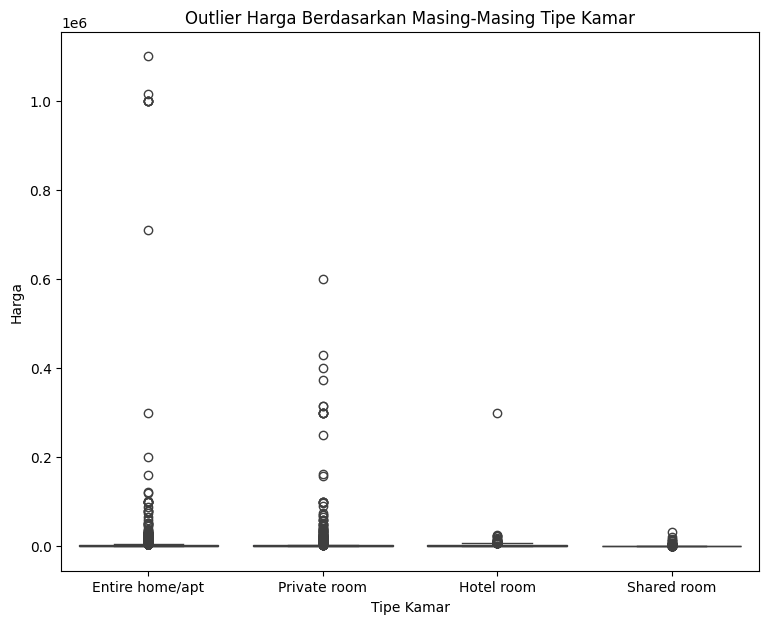

In [ ]:
#cek antara tipe kamar dengan harga
plt.figure(figsize=(9,7))
sns.boxplot(x='room_type',y='price',data=data_clean)
plt.title('Outlier Harga Berdasarkan Masing-Masing Tipe Kamar')
plt.xlabel('Tipe Kamar')
plt.ylabel('Harga')

In [ ]:
# cek harga di tipe kamar entire home/apt
price_entire_home = data_clean[data_clean['room_type']=='Entire home/apt'][['price']].sort_values(by='price',ascending=False)
display(price_entire_home.head())
display(price_entire_home.tail())

price
12868  1100000
12300  1014758
9345   1000000
6289   1000000
1239   1000000

price
11215    348
1481     346
9657     346
5246     337
10222    332

In [ ]:
# cek harga di tipe kamar private
price_private_room = data_clean[data_clean['room_type']=='Private room'][['price']].sort_values(by='price',ascending=False)
display(price_private_room.head())
display(price_private_room.tail())

price
4373   600700
11885  429443
12792  400717
6549   372227
6760   314899

price
11663    315
7831     310
8974     304
9529     300
15551    278

In [ ]:
# cek harga di tipe kamar hotel
price_hotel_room = data_clean[data_clean['room_type']=='Hotel room'][['price']].sort_values(by='price',ascending=False)
display(price_hotel_room.head())
display(price_hotel_room.tail())

price
2668  300000
3415   24390
6281   23671
6283   23629
6282   23029

price
4561    330
8445    326
2770    318
2748    318
8983    318

In [ ]:
# cek harga di tipe kamar shared room
price_shared_room = data_clean[data_clean['room_type']=='Shared room'][['price']].sort_values(by='price',ascending=False)
display(price_shared_room.head())
display(price_shared_room.tail())

price
7857  31200
6868  20895
2430  17316
5577  13852
5079  13000

price
9636     303
15473    295
15401    280
15455    280
15456    280

+ Dari data dapat disimpulkan bahwa :

1. Terdapat outlier yang terjadi pada semua tipe kamar.
2. outlier yang terdapat di setiap tipe kamar memang sangat lah tinggi bisa jadi di karenakan properti tersebut masuk properti eksklusif atau memang luxury

coba untuk cari outliers dari outliers

In [ ]:
# Mencari Outliers dari Outliers
q1_price = df_outliers.price.quantile(.25)
q3_price = df_outliers.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR of the variable price: ', IQR_price)

# define the limits
upper_bound = q3_price + 1.5 * IQR_price
lower_bound = q1_price - 1.5 * IQR_price

print('Upper limit of price: ', upper_bound)
print('Lower limit of price: ', lower_bound)

IQR of the variable price:  5064.5
Upper limit of price:  18161.25
Lower limit of price:  -2096.75


In [ ]:
print("The original dataset has {} entries".format(data_clean.shape[0]))
print("{} Entries with price above 18161.5".format(len(data_clean[data_clean.price > upper_bound])))
print("It represents {:.2f}% from the dataset".format((len(data_clean[data_clean.price > upper_bound]) / data_clean.shape[0])*100))

The original dataset has 15854 entries
152 Entries with price above 18161.5
It represents 0.96% from the dataset


Harga batas atas 18161.25 ini lebih sesuai dengan keadaan harga pada pasar airbnb bangkok (lebih masuk akal karena kalo dalam bath dan di konversi ke rupiah itu harga sekitar 9 jutaan yang kalau di cek langsung di internet masih masuk akal berdasarkan kurs per agustus 2025) jadi dapat terlihat/menunjukan perbedaan mana listing yang mahal(mungkin menyasar pasar luxury) dan murah(menyasar pasar budget). Jadi karena itu menggunakan upper bound ini untuk bisa dijadikan sebagai batas atas harga.

Bagian minimum night

In [ ]:
# cari outliers dari variable minimum_night
q1_night = data_clean.minimum_nights.quantile(.25)
q3_night = data_clean.minimum_nights.quantile(.75)
IQR_night = q3_night - q1_night
print('IQR of the variable min nights: ', IQR_night)

# atur limits
upper_bound_night = q3_night + 1.5 * IQR_night
lower_bound_night = q1_night - 1.5 * IQR_night

print('Upper limit of min nights: ', upper_bound_night)
print('Lower limit of min nights: ', lower_bound_night)

IQR of the variable min nights:  6.0
Upper limit of min nights:  16.0
Lower limit of min nights:  -8.0


In [ ]:
#Outliers dari Outliers minimum nights
df_outliers1=data_clean[(data_clean['minimum_nights'] < lower_bound_night) | (data_clean['minimum_nights'] > upper_bound_night)]

In [ ]:
# Outliers dari Outliers
q1_night = df_outliers1.minimum_nights.quantile(.25)
q3_night = df_outliers1.minimum_nights.quantile(.75)
IQR_night = q3_night - q1_night
print('IQR of the variable min nights: ', IQR_night)

# atur limits
upper_bound_night = q3_night + 1.5 * IQR_night
lower_bound_night = q1_night - 1.5 * IQR_night

print('Upper limit of min nights: ', upper_bound_night)
print('Lower limit of min nights: ', lower_bound_night)

IQR of the variable min nights:  27.0
Upper limit of min nights:  95.5
Lower limit of min nights:  -12.5


In [ ]:
# Chek data dengan upper limit baru
print("There are {} entries with minimum nights above 95".format(len(data_clean[data_clean.minimum_nights > upper_bound_night])))
print("It represents {:.2f}% from the dataset".format((len(data_clean[data_clean.minimum_nights > upper_bound_night]) / data_clean.shape[0])*100))

There are 451 entries with minimum nights above 95
It represents 2.84% from the dataset


In [ ]:
# hapus outliers
data_clean.drop(data_clean[data_clean.price > upper_bound].index, axis=0, inplace=True)
data_clean.drop(data_clean[data_clean.minimum_nights > upper_bound_night].index, axis=0, inplace=True)

print('Shape before cleansing: ', df.shape)
print('Shape after cleansing: ',data_clean.shape)
print(f'{round(((1 - (data_clean.shape[0]/df.shape[0]))*100), 2)}% of the entries were removed.')


Shape before cleansing:  (15854, 17)
Shape after cleansing:  (15268, 16)
3.7% of the entries were removed.


Metode IQR pertama menghasilkan batas atas 16 malam, namun nilai tersebut dianggap terlalu ketat dan tidak sesuai dengan karakteristik pasar Airbnb, sehingga tidak digunakan. Analisis dilanjutkan kembali pada data yang telah disaring, dan menghasilkan batas atas baru yaitu 95 malam. Batas ini dinilai lebih realistis untuk membedakan antara listing jangka pendek dan jangka panjang.

# Handling untuk Duplicate Data

In [ ]:
# mengidentifikasi duplikasi data
data_clean.duplicated().sum()

np.int64(0)

In [ ]:
# Duplikat berdasarkan lokasi, neighbourhood, last_review, harga, nama, dan room type
data_duplicate = data_clean[data_clean.duplicated(subset=['latitude', 'longitude', 'neighbourhood', 'last_review', 'price', 'name', 'room_type'], keep=False)]
display('Jumlah data duplikat:', len(data_duplicate))
data_duplicate.head(6)

'Jumlah data duplikat:'

22

id                                     name    host_id  \
5890             28831409                NA BANGLAMPOO GUEST HOUSE   87704107   
5976             28907857                NA BANGLAMPOO GUEST HOUSE   87704107   
8789             37953702                                   small1   97598307   
8790             37954129                                   small1   97598307   
15120  767112544721073364  Sathon Luxury Loft/China Town/Icon Siam  276781306   
15121  767128654727724698  Sathon Luxury Loft/China Town/Icon Siam  276781306   

      host_name neighbourhood   latitude   longitude        room_type  price  \
5890        Yui   Phra Nakhon  13.762790  100.497900     Private room   1400   
5976        Yui   Phra Nakhon  13.762790  100.497900     Private room   1400   
8789        Soo    Don Mueang  13.920720  100.575780      Shared room    350   
8790        Soo    Don Mueang  13.920720  100.575780      Shared room    350   
15120      Alex        Sathon  13.710777  100.519891  Entire home/apt   1580   
15121      Alex        Sathon  13.710777  100.519891  Entire home/apt   1580   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
5890                1                  0         NaN                0.0   
5976                1                  0         NaN                0.0   
8789                1                  0         NaN                0.0   
8790                1                  0         NaN                0.0   
15120               1                  0         NaN                0.0   
15121               1                  0         NaN                0.0   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
5890                                9               361                      0  
5976                                9               361                      0  
8789                                4               180                      0  
8790                                4               180                      0  
15120                              13               326                      0  
15121                              13               339                      0

In [ ]:
data_duplicate.groupby(['name','latitude','longitude','host_name'])[['id']].count()

id
name                                               latitude  longitude  host_name    
Family Room for 4 People                           13.740168 100.556320 Rachan      2
Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9    13.756184 100.568269 Tricia      1
                                                                        Willam      2
                                                   13.757097 100.568486 Alice       2
NA BANGLAMPOO GUEST HOUSE                          13.762790 100.497900 Yui         2
New! Gateway/ Bangkok University 1BR 2PPL near BTS 13.716669 100.584967 Nana        1
                                                                        Noons       1
Sathon Luxury 2 br/China Town/Icon Siam            13.710777 100.519891 Alex        1
                                                                        Alice       2
                                                                        Tricia      2
                                                                        Willam      1
Sathon Luxury Loft/China Town/Icon Siam            13.710777 100.519891 Alex        2
                                                                        Alice       1
small1                                             13.920720 100.575780 Soo         2

+ Setelah dilakukan pengecekan data yang duplikat diketahui bahwa:
  1. Pada pengecekan data duplikat di atas, dapat diamati bahwa akomodasi dengan nama yang sama dan latitude & longitude yang sama terdaftar dengan nama host yang berbeda.
  2. Namun mungkin properti ini sebenarnya sama saja tapi memiliki beberapa admin/PIC yang berbeda yang menjadi pengurus, seperti yang diperlihatkan oleh harga yang sama, ulasan terakhir, dan jenis akomodasi yang sama. Hal ini dapat menyebabkan konflik pemesanan,
  3. Tetapi untuk akomodasi tipe Private room, Shared room,Entire home/apt, dan Hotel room sebenarnya dapat di justifikasi karena kalau memang pada 1 lokasi ada beberapa kamar dan dibawah 1 owner yang sama dengan PIC yang berbeda pasti lokasi serta latitude & longitude nya juga sama harga pun juga sama
+ Setelah di pertimbangkan lebih baik data duplikat tersebut akan saya drop karena mengacu pada poin nomer 2 dapat menyebabkan konflik pada pemesanan

In [ ]:
# Drop Duplicate Data
data_clean.drop_duplicates(subset=['longitude', 'latitude','last_review','price','name','room_type'], keep='first', inplace=True, ignore_index=False)

# Handling untuk data dengan aksara thailand/cina dan sejenisnya (tidak jadi digunakan alasan karena bila fitur translate ini digunakan menyebabkan konflik data dan jadi aneh sperti ada yang kalo di translate jadi artinya bright (cahaya)) dan memang tidak digunakan dalam projek ini setelah di pertimbangkan dari segi scope

In [ ]:
# !pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=2bc37e975c2f70de64dcc37c53db39b272663df1964db4f4643dc77209101667
  Stored in directory: /root/.cache/pip/wheels/95/0f/04/b17a72024b56a60e499ce1a6313d283ed5ba332407155bee03
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfra

In [ ]:
# from googletrans import Translator
# import re

In [ ]:
# #Inisialisasi translator
# translator = Translator()

In [ ]:
# #Fungsi cek apakah teks ada aksara non-Latin
# def contains_non_latin(text):
#     if pd.isnull(text):
#         return False
#     return bool(re.search(r'[^\u0000-\u007F]', str(text)))

In [ ]:
# #Fungsi translate khusus untuk kolom name
# def translate_text(text):
#     if pd.isnull(text):
#         return text
#     if contains_non_latin(text):
#         try:
#             return translator.translate(str(text), dest='en').text
#         except:
#             return text
#     return text

In [ ]:
# #Terapkan hanya pada kolom 'name'
# if 'name' in df.columns:
#     df['name_translated'] = df['name'].apply(translate_text)

In [ ]:
# #Preview: tampilkan baris yang benar-benar mengalami translate
# preview_df = df[df['name'] != df['name_translated']][['name', 'name_translated']].head(20)
# print("=== Preview hasil translate (max 20 baris) ===")
# print(preview_df.to_string(index=False))

=== Preview hasil translate (max 20 baris) ===
                                              name                                                           name_translated
                      กรองทองแมนชั่น (ลาดพร้าว 81)                                         Krongthong Mansion (Lat Phrao 81)
                             เฮ้าส์โหมด House Mode                                                           House mode mode
                     Chambre privée en condominium                                                  Private condominium room
                                  วรภาดา น้อยพันธ์                                                         Woraphada Noiphan
✩Vibrant street✩Cozy n Cool near MRT Silom/center✩                       ✩Vibrant street✩cozy n cool near dead force/center✩
บ้านใกล้สุวรรณภูมิ ตรงข้ามแอร์พอร์ตลิ้งบ้านทับช้าง                    House near SuvarnabhumiOpposite Airport Ban Thap Chang
     French Vintage Around the World B&B 中文服務 華語溝通 French Vintage Around the W

In [ ]:
# #Terapkan hanya pada kolom 'host_name'
# if 'host_name' in df.columns:
#     df['host_name_translated'] = df['host_name'].apply(translate_text)

In [ ]:
# #Preview: tampilkan baris yang berubah
# preview_df = df[df['host_name'] != df['host_name_translated']][['host_name', 'host_name_translated']].head(20)

# print("=== Preview hasil translate host_name (max 20 baris) ===")
# print(preview_df.to_string(index=False))

=== Preview hasil translate host_name (max 20 baris) ===
     host_name host_name_translated
      วสวัตติ์            Worasawat
      วสวัตติ์            Worasawat
           Gün                  Day
        สมพจน์                  Sch
        สมพจน์                  Sch
โกมลเรสซิเดนซ์   Komol Rrescendance
        สุรกิต              Surakit
        ภัทรมน            Phatramon
        เอกชัย              Ekachai
       นวลนารา             Nuannara
          ป๊อป                  Pop
             健               Health
        อัครพล            Akaraphon
    ธัญญารัตน์            Thanyarat
        อภิสรา              Apisara
         ธนกฤต            Thanakrit
             明               bright
       ปรารถนา                 wish
       甫宜 Fuyi                 Fuyi
       ปรารถนา                 wish


In [ ]:
# data_clean['host_name'].isna().sum()

np.int64(1)

# membereskan kolom yang masih memiliki nilai kosong (NaN atau null),Membuat kolom baru untuk last review year dan Mengubah kolom 'last_review' menjadi tipe datetime.

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15254 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15254 non-null  object 
 1   name                            15254 non-null  object 
 2   host_id                         15254 non-null  object 
 3   host_name                       15253 non-null  object 
 4   neighbourhood                   15254 non-null  object 
 5   latitude                        15254 non-null  float64
 6   longitude                       15254 non-null  float64
 7   room_type                       15254 non-null  object 
 8   price                           15254 non-null  int64  
 9   minimum_nights                  15254 non-null  int64  
 10  number_of_reviews               15254 non-null  int64  
 11  last_review                     9801 non-null   object 
 12  reviews_per_month               15254

In [ ]:
data_clean.dropna(subset='host_name', inplace=True)

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15253 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15253 non-null  object 
 1   name                            15253 non-null  object 
 2   host_id                         15253 non-null  object 
 3   host_name                       15253 non-null  object 
 4   neighbourhood                   15253 non-null  object 
 5   latitude                        15253 non-null  float64
 6   longitude                       15253 non-null  float64
 7   room_type                       15253 non-null  object 
 8   price                           15253 non-null  int64  
 9   minimum_nights                  15253 non-null  int64  
 10  number_of_reviews               15253 non-null  int64  
 11  last_review                     9800 non-null   object 
 12  reviews_per_month               15253

In [ ]:
data_clean.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5453
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [ ]:
data_clean['last_review'].fillna('1900-01-01', inplace=True)

In [ ]:
data_clean.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

Kolom baru untuk last review year & mengubah kolom 'last_review' menjadi tipe datetime

In [ ]:
# Mengubah kolom 'last_review' menjadi tipe datetime
data_clean['last_review'] = pd.to_datetime(data_clean['last_review'])

# Mengubah kolom 'last_review' menjadi datetime dengan format 'YYYY-MM-DD'
data_clean['last_review'] = pd.to_datetime(data_clean['last_review'], format='%Y-%m-%d')

In [ ]:
# Membuat kolom baru 'last_review_year' yang berisi tahun dari kolom 'last_review'
data_clean['last_review_year'] = data_clean['last_review'].dt.year

In [ ]:
# Filter baris dengan nilai 'last_review' adalah '1900-01-01'
filtered_data = data_clean[data_clean['last_review'] == '1900-01-01']

# Hitung jumlah baris di setiap kelompok dan tampilkan
number_of_reviews = filtered_data.groupby(['last_review', 'number_of_reviews']).size().reset_index(name='jumlah')

number_of_reviews


last_review  number_of_reviews  jumlah
0  1900-01-01                  0    5453

Mengisi NaN pada kolom last_Review dengan tanggal default yaitu 1900-01-01 seperti yang di lakukan pada bagian menangani missing valeu ,
yang secara efektif menandai bagian tersebut sebagai listing "belum diulas" tanpa menghapus baris data yang berharga.

# Membuat kelompok area baru untuk memudahkan analisis

In [ ]:
data_clean['neighbourhood'].unique()

array(['Ratchathewi', 'Bang Na', 'Bang Kapi', 'Din Daeng', 'Rat Burana',
       'Chatu Chak', 'Khlong San', 'Bang Rak', 'Phaya Thai', 'Sathon',
       'Khlong Toei', 'Vadhana', 'Sai Mai', 'Lat Krabang', 'Bangkok Yai',
       'Wang Thong Lang', 'Huai Khwang', 'Phasi Charoen', 'Bang Sue',
       'Nong Chok', 'Phra Khanong', 'Thawi Watthana', 'Bang Kho laen',
       'Pra Wet', 'Phra Nakhon', 'Thon buri', 'Yan na wa', 'Suanluang',
       'Don Mueang', 'Dusit', 'Lak Si', 'Parthum Wan', 'Samphanthawong',
       'Bueng Kum', 'Bang Phlat', 'Saphan Sung', 'Min Buri',
       'Khlong Sam Wa', 'Bang Khen', 'Lat Phrao', 'Chom Thong',
       'Bangkok Noi', 'Pom Prap Sattru Phai', 'Nong Khaem', 'Thung khru',
       'Bang Khae', 'Bang Khun thain', 'Taling Chan', 'Khan Na Yao',
       'Bang Bon'], dtype=object)

In [ ]:
def label(neighbourhood):
    if neighbourhood in ['Chatu Chak','Bang Sue','Dusit','Bang Rak','Bangkok Noi','Bangkok Yai','Khlong Toei','Ratchathewi','Parthum Wan','Pom Prap Sattru Phai','Phra Nakhon','Phaya Thai','Huai Khwang','Din Daeng','Sathon','Khlong San','Thon buri','Bang Kho laen','Yan na wa','Samphanthawong','Vadhana']:
        return 'Inner City'
    elif neighbourhood in['Sai Mai','Bang Kapi','Lat Phrao','Bang Khen','Bueng Kum','Chom Thong','Bang Na','Pra Wet','Suanluang','Saphan Sung','Khan Na Yao','Wang Thong Lang','Thung khru','Bang Khae','Bang Phlat','Phra Khanong','Rat Burana','Phasi Charoen']:
        return 'Middle City'
    elif neighbourhood in['Nong Chok','Lat Krabang','Min Buri','Khlong Sam Wa','Taling Chan','Lak Si','Don Mueang','Bang Khun thain','Bang Bon','Nong Khaem','Thawi Watthana']:
        return 'Outer City'
    else :
        return 'Unknown'

data_clean['Label City'] = data_clean['neighbourhood'].apply(label)

In [ ]:
data_clean.head()

id                                            name host_id   host_name  \
0   27934                 Nice room with superb city view  120437      Nuttee   
1   27979                  Easy going landlord,easy place  120541         Emy   
2   28745               modern-style apartment in Bangkok  123784  Familyroom   
3   35780  Spacious one bedroom at The Kris Condo Bldg. 3  153730     Sirilak   
4  941865                      Suite Room 3 at MetroPoint  610315       Kasem   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0   Ratchathewi  13.75983  100.54134  Entire home/apt   1905               3   
1       Bang Na  13.66818  100.61674     Private room   1316               1   
2     Bang Kapi  13.75232  100.62402     Private room    800              60   
3     Din Daeng  13.78823  100.57256     Private room   1286               7   
4     Bang Kapi  13.76872  100.63338     Private room   1905               1   

   number_of_reviews last_review  reviews_per_month  \
0                 65  2020-01-06               0.50   
1                  0  1900-01-01               0.00   
2                  0  1900-01-01               0.00   
3                  2  2022-04-01               0.03   
4                  0  1900-01-01               0.00   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               2               353                      0   
1                               2               358                      0   
2                               1               365                      0   
3                               1               323                      1   
4                               3               365                      0   

   last_review_year   Label City  
0              2020   Inner City  
1              1900  Middle City  
2              1900  Middle City  
3              2022   Inner City  
4              1900  Middle City

# Cek ulang sebelum save file bersih

In [ ]:
print('Shape before cleansing: ', df.shape)
print('Shape after cleansing: ',data_clean.shape)
print(f'{(df.shape[0]) - (data_clean.shape[0])} rows were removed or')
print(f'{round(((1 - (data_clean.shape[0]/df.shape[0]))*100), 2)}% of the entries were removed.')

Shape before cleansing:  (15854, 17)
Shape after cleansing:  (15253, 18)
601 rows were removed or
3.79% of the entries were removed.


# Save Data to CSV & Excel File

In [ ]:
data_clean.to_csv('airbnb_bangkok_cleaned_data.csv', index=False)

In [ ]:
data_clean.to_excel('airbnb_bangkok_cleaned_data.xlsx', index=False)

# Data Eksternal Berupa geojson wilayah bangkok

Link untuk file geojson : https://insideairbnb.com/get-the-data/ pilih yang tahun 2025

In [ ]:
import geopandas as gpd

gdf = gpd.read_file('neighbourhoods.geojson')

In [ ]:
# Tentukan fungsi untuk menentukan kategori area
def determine_area(row):
    if row['neighbourhood'] in ['Chatu Chak','Bang Sue','Dusit','Bang Rak','Bangkok Noi','Bangkok Yai','Khlong Toei','Ratchathewi','Parthum Wan','Pom Prap Sattru Phai','Phra Nakhon','Phaya Thai','Huai Khwang','Din Daeng','Sathon','Khlong San','Thon buri','Bang Kho laen','Yan na wa','Samphanthawong','Vadhana']:
        return 'Inner City'
    elif row['neighbourhood'] in ['Sai Mai','Bang Kapi','Lat Phrao','Bang Khen','Bueng Kum','Chom Thong','Bang Na','Pra Wet','Suanluang','Saphan Sung','Khan Na Yao','Wang Thong Lang','Thung khru','Bang Khae','Bang Phlat','Phra Khanong','Rat Burana','Phasi Charoen']:
        return 'Middle City'
    elif row['neighbourhood'] in ['Nong Chok','Lat Krabang','Min Buri','Khlong Sam Wa','Taling Chan','Lak Si','Don Mueang','Bang Khun thain','Bang Bon','Nong Khaem','Thawi Watthana']:
        return 'Outer City'
    else:
        return 'Unknown'

# Tambahkan kolom 'area' berdasarkan kategori
gdf['area'] = gdf.apply(determine_area, axis=1)

# Simpan kembali ke GeoJSON
gdf.to_file('edited_data.geojson', driver='GeoJSON')

In [ ]:
df=pd.read_csv('airbnb_bangkok_cleaned_data.csv')
df.head(3)

id                               name  host_id   host_name  \
0  27934    Nice room with superb city view   120437      Nuttee   
1  27979     Easy going landlord,easy place   120541         Emy   
2  28745  modern-style apartment in Bangkok   123784  Familyroom   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0   Ratchathewi  13.75983  100.54134  Entire home/apt   1905               3   
1       Bang Na  13.66818  100.61674     Private room   1316               1   
2     Bang Kapi  13.75232  100.62402     Private room    800              60   

   number_of_reviews last_review  reviews_per_month  \
0                 65  2020-01-06                0.5   
1                  0  1900-01-01                0.0   
2                  0  1900-01-01                0.0   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               2               353                      0   
1                               2               358                      0   
2                               1               365                      0   

   last_review_year   Label City  
0              2020   Inner City  
1              1900  Middle City  
2              1900  Middle City

# EDA Perserbaran Wilayah

In [ ]:
import folium
import json

# Path ke file GeoJSON neighbourhood
neighbourhood_geojson = "neighbourhoods.geojson"

# Path ke file GeoJSON area besar (Inner, Middle, Outer)
area_geojson = "edited_data.geojson"

# Buat df_n dengan cara mengelompokkan data berdasarkan 'neighbourhood'
df_n = df.groupby('neighbourhood')['id'].count().reset_index(name='listing_count')

# Buat peta dasar (CartoDB Positron sebagai default)
m = folium.Map(location=[13.736717, 100.523186], zoom_start=10.45, tiles=None)

# OpenStreetMap
folium.TileLayer('openstreetmap', name="OpenStreetMap").add_to(m)

# CartoDB Dark Matter
folium.TileLayer(
    tiles="https://cartodb-basemaps-a.global.ssl.fastly.net/dark_all/{z}/{x}/{y}{r}.png",
    attr="© OpenStreetMap contributors © CartoDB",
    name="CartoDB Dark Matter"
).add_to(m)

# CartoDB Positron
folium.TileLayer(
    tiles="https://cartodb-basemaps-a.global.ssl.fastly.net/light_all/{z}/{x}/{y}{r}.png",
    attr="© OpenStreetMap contributors © CartoDB",
    name="CartoDB Positron"
).add_to(m)

# Esri Satellite
folium.TileLayer(
    tiles="https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}",
    attr="Tiles © Esri",
    name="Esri Satellite"
).add_to(m)


# Tambahkan layer GeoJSON untuk area besar dengan warna berbeda
color_dict = {
    "Inner City": "salmon",
    "Middle City": "lightgreen",
    "Outer City": "skyblue"
}

folium.GeoJson(
    area_geojson,
    name='Area Besar (Label City)',
    style_function=lambda feature: {
        'fillColor': color_dict.get(feature['properties']['area'], 'gray'),
        'color': color_dict.get(feature['properties']['area'], 'gray'),
        'weight': 2,
        'fillOpacity': 0.2
    },
    tooltip=folium.GeoJsonTooltip(fields=["area"]),
    popup=folium.GeoJsonPopup(fields=["area"]),
).add_to(m)

# Tambahkan marker label untuk area besar
coordinates = {
    'Inner City': (13.759345823315462, 100.53327283237591),
    'Middle City': (13.71967597772107, 100.40014772469395),
    'Outer City': (13.862456729278676, 100.78387129734865)
}
for area, coord in coordinates.items():
    label_area = f"<b><span style='color: black; text-shadow: 0px 0px 8px white;'>{area}</span></b>"
    folium.Marker(
        location=coord,
        icon=folium.DivIcon(html=label_area),
        tooltip=f"Area: {area}",
        popup=f"Ini adalah area {area}"
    ).add_to(m)

# Tambahkan choropleth untuk jumlah listing per neighbourhood
folium.Choropleth(
    geo_data=neighbourhood_geojson,
    name='Jumlah Listing per Neighbourhood',
    data=df_n,
    columns=['neighbourhood', 'listing_count'],
    key_on='feature.properties.neighbourhood',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Jumlah Airbnb Listing di Bangkok',
    highlight=True,
    zoom_on_click=True,
    tooltip=folium.GeoJsonTooltip(fields=["neighbourhood", "listing_count"]),
    popup=folium.GeoJsonPopup(fields=["neighbourhood", "listing_count"]),
).add_to(m)

# Tambahkan marker centroid untuk setiap neighbourhood
with open(neighbourhood_geojson, 'r') as f:
    geo_data = json.load(f)

neighbourhood_centroids = {}
for feature in geo_data['features']:
    neighbourhood = feature['properties']['neighbourhood']
    coords = feature['geometry']['coordinates']
    geom_type = feature['geometry']['type']
    if geom_type == 'Polygon':
        lons, lats = zip(*coords[0])
        neighbourhood_centroids[neighbourhood] = (sum(lats) / len(lats), sum(lons) / len(lons))
    elif geom_type == 'MultiPolygon':
        all_lons, all_lats = [], []
        for polygon in coords:
            lons, lats = zip(*polygon[0])
            all_lons.extend(lons)
            all_lats.extend(lats)
        neighbourhood_centroids[neighbourhood] = (sum(all_lats) / len(all_lats), sum(all_lons) / len(all_lons))

for _, row in df_n.iterrows():
    neighbourhood = row['neighbourhood']
    listing_count = row['listing_count']
    if neighbourhood in neighbourhood_centroids:
        lat, lon = neighbourhood_centroids[neighbourhood]
        folium.CircleMarker(
            location=(lat, lon),
            radius=4,
            color="blue",
            fill=True,
            fill_color="blue",
            fill_opacity=0.7,
            tooltip=f"{neighbourhood} ({listing_count} listing)",
            popup=f"<b>{neighbourhood}</b><br>Jumlah listing: {listing_count}"
        ).add_to(m)

# judul peta
title_html = """
<h3 align="center"><b>Jumlah Airbnb Listing di Bangkok</b></h3>
"""
m.get_root().html.add_child(folium.Element(title_html))

# Tambahkan legenda manual untuk area besar
legend_html = """
<div style="
    position: fixed;
    bottom: 50px; left: 50px; width: 200px; height: 120px;
    border:2px solid grey; z-index:9999; font-size:14px;
    background-color:white; opacity:0.9; padding: 10px;">
    <b>Area Besar (Label City)</b><br>
    <i style="background:salmon; width:10px; height:10px; display:inline-block;"></i> Inner City<br>
    <i style="background:lightgreen; width:10px; height:10px; display:inline-block;"></i> Middle City<br>
    <i style="background:skyblue; width:10px; height:10px; display:inline-block;"></i> Outer City
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# Kontrol layer (pilihan map + layer data)
folium.LayerControl().add_to(m)

m


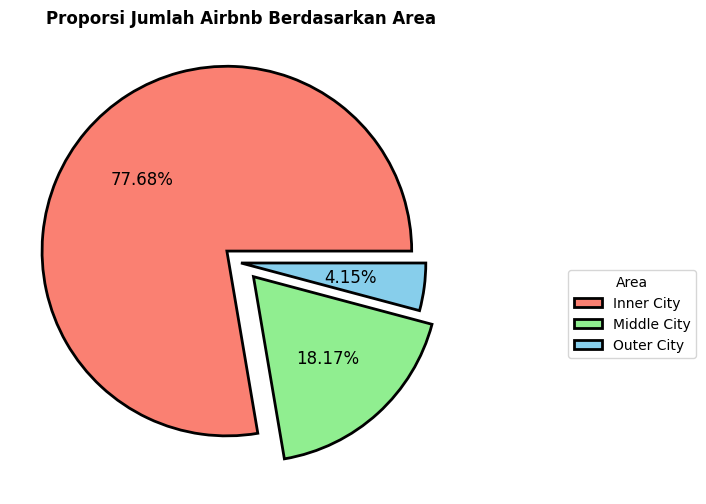

In [ ]:
# Create df_area by grouping and counting listings per area
df_area = data_clean.groupby('Label City').size().reset_index(name='count')

#pie chart jumlah airbnb
plt.figure(figsize=(10,6))
plt.pie(x=df_area['count'],autopct='%.2f%%',
        textprops={'color': 'black', 'fontsize': 12},
        explode=(0.1,0.1,0),
        colors=['salmon', 'lightgreen', 'skyblue'],
        wedgeprops={'edgecolor': 'black', 'linewidth': 2})
plt.legend(df_area['Label City'], title='Area', loc='upper right', bbox_to_anchor=(1.5, 0.5))
plt.title('Proporsi Jumlah Airbnb Berdasarkan Area', fontweight='bold')
plt.show()

Analisa:

+ Inner City (77.68%)

  Dominasi jelas: hampir 4 dari 5 listing Airbnb ada di pusat kota.

  Ini menunjukkan konsentrasi sangat tinggi di pusat Bangkok → karena area ini memang pusat wisata (Siam, Sukhumvit, Silom, Khaosan, dll).

  Implikasi: persaingan antar host di Inner City sangat ketat, harga bisa lebih kompetitif. Namun, permintaan juga tinggi sehingga potensi okupansi tetap besar.

+ Middle City (18.17%)

  Jumlah listing jauh lebih sedikit dibandingkan Inner City.

  Area ini mungkin punya potensi pertumbuhan → masih cukup dekat dengan pusat kota, tapi dengan harga properti lebih rendah.

  Bisa jadi target ekspansi Airbnb untuk menjaring wisatawan yang mencari opsi lebih murah atau ingin tinggal di area lebih tenang.

+ Outer City (4.15%)

  Hampir tidak ada listing dibanding dua area lain.

  Artinya supply sangat rendah, meski mungkin masih ada demand (misalnya dekat bandara atau kawasan industri/universitas).

  Bisa jadi peluang besar untuk host baru → kompetisi rendah. Tapi, perlu analisis tambahan apakah demand memang ada di area ini (bisa cek dari jumlah review).

Kelebihan supply di Inner City → strategi Airbnb sebaiknya fokus pada quality differentiation (review, fasilitas, pengalaman unik) agar host bisa menonjol di pasar yang padat.

Potensi pertumbuhan ada di Middle City → Airbnb dapat mendorong promosi dan mengajak lebih banyak host di sini agar supply lebih seimbang dengan permintaan.

Opportunity baru di Outer City → meski kontribusi listing kecil, ini bisa jadi pasar niche. Airbnb bisa melakukan riset demand lebih lanjut, apakah ada segmen traveler tertentu (bisnis, transit, atau wisata alternatif) yang bisa ditargetkan.

# EDA Deskriptif

Distribusi Tipe Kamar Berdasarkan Zona Kota

Distribusi Tipe Kamar Berdasarkan Zona Kota:


room_type    Entire home/apt  Hotel room  Private room  Shared room
Label City                                                         
Inner City              6836         578          3989          445
Middle City             1464          36          1227           45
Outer City               191          28           387           27

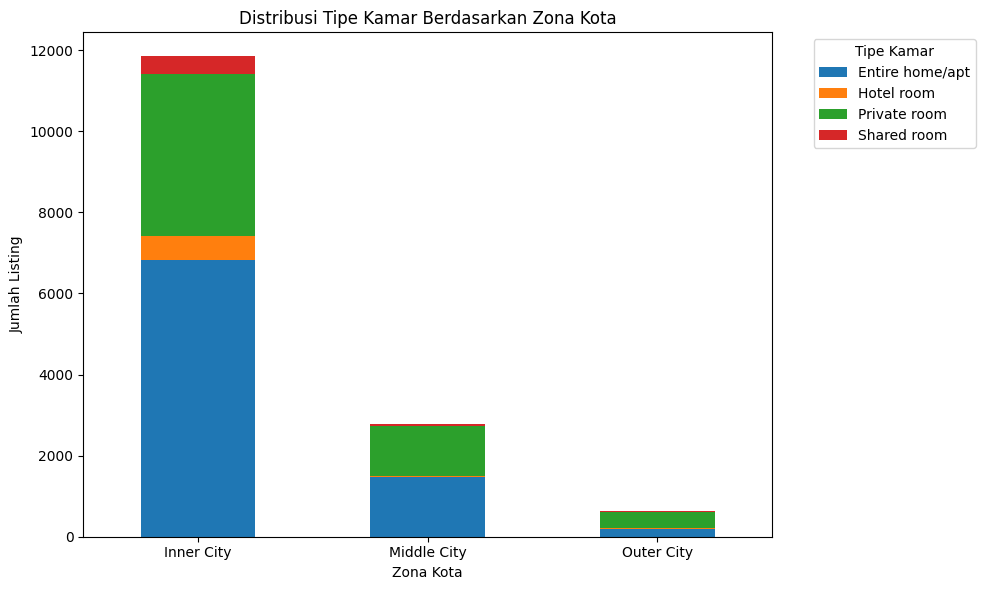

In [ ]:
# Mengidentifikasi preferensi tipe room di Bangkok serta perbedaannya antar zona kota
room_type_distribution = data_clean.groupby(['Label City', 'room_type']).size().unstack(fill_value=0)

# Menampilkan hasil
print("Distribusi Tipe Kamar Berdasarkan Zona Kota:")
display(room_type_distribution)

# Visualisasi stacked bar chart
room_type_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribusi Tipe Kamar Berdasarkan Zona Kota')
plt.xlabel('Zona Kota')
plt.ylabel('Jumlah Listing')
plt.xticks(rotation=0)
plt.legend(title='Tipe Kamar', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Analisa Distribusi Tipe Kamar:
1. Inner City: Zona ini memiliki jumlah listing terbanyak untuk semua tipe kamar, mencerminkan statusnya sebagai pusat aktivitas dan daya tarik utama di Bangkok. Tipe 'Entire home/apt' mendominasi, diikuti oleh 'Private room'. Ini menunjukkan bahwa di pusat kota, wisatawan cenderung mencari akomodasi privat, baik seluruh rumah/apartemen maupun kamar pribadi.
2. Middle City: Zona ini memiliki jumlah listing yang jauh lebih sedikit dibandingkan Inner City. Mirip dengan Inner City, 'Entire home/apt' dan 'Private room' masih menjadi tipe kamar dominan, namun dengan proporsi yang sedikit berbeda. Hal ini menunjukkan bahwa zona pinggiran kota juga menawarkan opsi akomodasi privat, kemungkinan dengan harga yang lebih terjangkau dibandingkan pusat kota.
3. Outer City: Zona terluar ini memiliki jumlah listing paling sedikit. Di sini, 'Private room' sedikit lebih banyak dibandingkan 'Entire home/apt'. Proporsi 'Hotel room' dan 'Shared room' sangat kecil di semua zona.

Kesimpulan:

Secara keseluruhan, preferensi tipe kamar di Bangkok sangat condong ke akomodasi privat ('Entire home/apt' dan 'Private room'), terutama di Inner dan Middle City. Ini mengindikasikan bahwa wisatawan yang datang ke Bangkok lebih memilih privasi dibandingkan opsi berbagi ('Shared room') atau hotel tradisional ('Hotel room'). Inner City menawarkan pilihan akomodasi privat paling banyak, sejalan dengan statusnya sebagai pusat turis utama.

Jumlah Review Berdasarkan Zona Kota dan Tipe Kamar

Jumlah Review Berdasarkan Zona Kota dan Tipe Kamar:


room_type    Entire home/apt  Hotel room  Private room  Shared room
Label City                                                         
Inner City            170833       11559         41828         2386
Middle City            19811         334          4284          212
Outer City              2161         636          4245           84

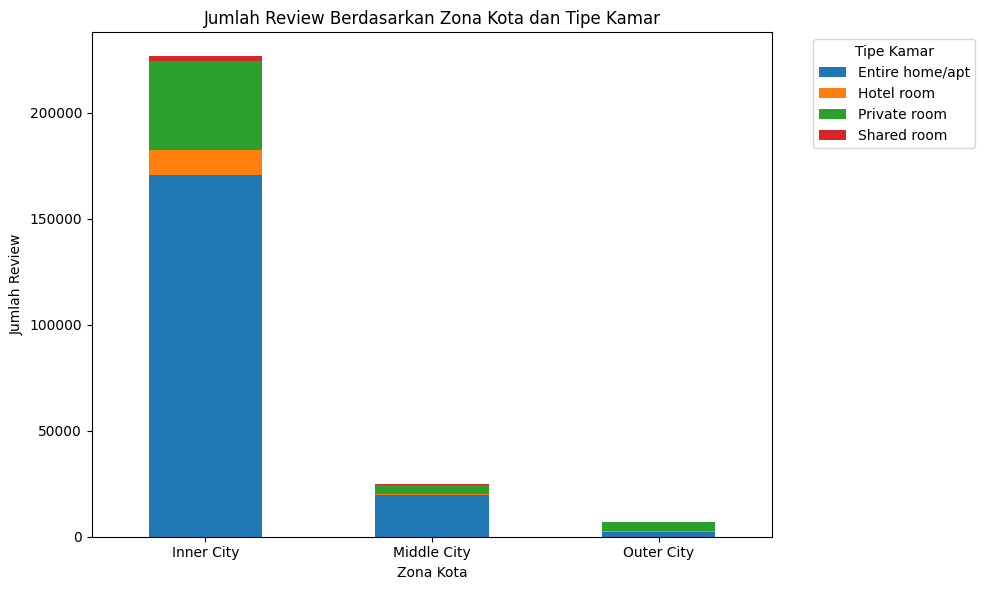

In [ ]:
# Menilai tingkat permintaan berdasarkan jumlah review untuk masing-masing room_type dan area
review_distribution = data_clean.groupby(['Label City', 'room_type'])['number_of_reviews'].sum().unstack(fill_value=0)

# Menampilkan hasil
print("Jumlah Review Berdasarkan Zona Kota dan Tipe Kamar:")
display(review_distribution)

# Visualisasi stacked bar chart
review_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Jumlah Review Berdasarkan Zona Kota dan Tipe Kamar')
plt.xlabel('Zona Kota')
plt.ylabel('Jumlah Review')
plt.xticks(rotation=0)
plt.legend(title='Tipe Kamar', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Berdasarkan tabel dan stacked bar chart di atas mengenai jumlah review berdasarkan zona kota dan tipe kamar, berikut adalah analisisnya:

+ Dominasi Inner City: Zona Inner City secara signifikan mendominasi jumlah total review dibandingkan Middle City dan Outer City. Ini sangat konsisten dengan temuan sebelumnya mengenai distribusi listing, di mana Inner City memiliki jumlah listing terbanyak. Jumlah review yang tinggi ini mengindikasikan permintaan yang juga sangat tinggi di area pusat kota, menegaskan daya tariknya sebagai destinasi utama wisatawan.
+ Preferensi Room Type Berdasarkan Review: Di semua zona, 'Entire home/apt' dan 'Private room' menerima jumlah review yang jauh lebih tinggi dibandingkan 'Hotel room' dan 'Shared room'. Ini menunjukkan bahwa meskipun ada listing untuk semua tipe kamar, wisatawan cenderung memberikan review lebih banyak untuk akomodasi tipe privat. Hal ini bisa diartikan bahwa pengalaman menginap di 'Entire home/apt' dan 'Private room' mungkin lebih menonjol atau lebih sering memicu wisatawan untuk memberikan feedback.
+ Inner City: Permintaan Tinggi untuk Akomodasi Privat: Di Inner City, 'Entire home/apt' memiliki jumlah review tertinggi, diikuti oleh 'Private room'. Ini menguatkan bahwa di pusat kota, permintaan untuk akomodasi privat, baik seluruh unit maupun kamar, sangat tinggi.
+ Middle dan Outer City: Potensi dan Preferensi: Meskipun jumlah review di Middle dan Outer City jauh lebih sedikit, pola preferensi akomodasi privat (terutama 'Private room' di Outer City) masih terlihat. Jumlah review yang relatif rendah di Outer City mungkin mencerminkan jumlah listing yang sedikit, namun jumlah review untuk 'Private room' di Outer City (4245) yang lebih tinggi dibandingkan 'Entire home/apt' (2161) menunjukkan bahwa ada permintaan yang cukup baik untuk tipe kamar ini di area tersebut, relatif terhadap jumlah listingnya.
+ 'Hotel room' dan 'Shared room' Minim Review: Kedua tipe kamar ini memiliki jumlah review yang sangat rendah di semua zona, bahkan di Inner City yang ramai. Ini bisa mengindikasikan beberapa hal: (a) wisatawan yang memilih tipe ini cenderung tidak memberikan review, (b) jumlah listing tipe ini jauh lebih sedikit (sesuai dengan distribusi listing), atau (c) pengalaman menginap kurang memorable dibandingkan akomodasi privat.

Kesimpulan dari Perspektif Permintaan:

Jumlah review menjadi indikator kuat tingkat permintaan dan kepuasan (yang mendorong review). Inner City jelas merupakan area dengan permintaan tertinggi untuk Airbnb, terutama untuk akomodasi privat. Middle City memiliki permintaan yang moderat, dan Outer City memiliki permintaan yang paling rendah, meskipun 'Private room' menunjukkan potensi relatif di area ini. Data review ini mendukung strategi Airbnb untuk fokus pada peningkatan kualitas dan visibilitas listing privat di Inner City yang kompetitif, serta mengeksplorasi potensi pertumbuhan di Middle City dan niche market 'Private room' di Outer City.

Jumlah Listing yang Diulas per Tahun

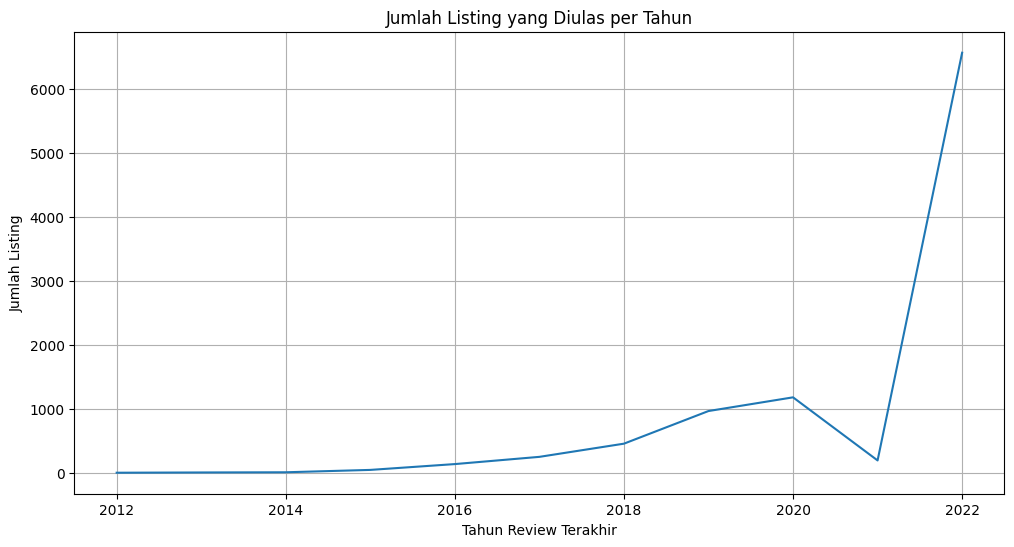

In [ ]:
# Filter daftar yang tidak memiliki ulasan (last_review_year == 1900)
reviewed_listings = data_clean[data_clean['last_review_year'] != 1900]

# Kelompokkan berdasarkan last_review_year dan hitung jumlah listing
listings_over_time = reviewed_listings.groupby('last_review_year').size().reset_index(name='number_of_listings')

# Plot jumlah listing dari waktu ke waktu
plt.figure(figsize=(12, 6))
sns.lineplot(data=listings_over_time, x='last_review_year', y='number_of_listings')
plt.title('Jumlah Listing yang Diulas per Tahun')
plt.xlabel('Tahun Review Terakhir')
plt.ylabel('Jumlah Listing')
plt.grid(True)
plt.show()

Analisis:

Plot ini menunjukkan tren jumlah listing Airbnb di Bangkok yang menerima ulasan dari tahun 2012 hingga 2022. Dapat dilihat bahwa:

+ Pertumbuhan yang Signifikan: Terdapat peningkatan yang sangat jelas dalam jumlah listing yang diulas dari tahun ke tahun, terutama mulai tahun 2015. Ini menunjukkan pertumbuhan yang pesat dalam aktivitas Airbnb di Bangkok.
+ Puncak di Tahun 2022: Tahun 2022 menunjukkan lonjakan yang sangat besar dalam jumlah listing yang diulas, jauh melampaui tahun-tahun sebelumnya. Hal ini kemungkinan besar mencerminkan pemulihan pariwisata pasca-pandemi COVID-19, di mana Bangkok kembali menjadi destinasi populer dan banyak listing menerima tamu dan ulasan.
+ Penurunan di Tahun 2020 dan 2021: Terlihat penurunan tajam pada tahun 2020 dan 2021. Ini sangat mungkin disebabkan oleh dampak pandemi COVID-19 yang membatasi perjalanan internasional dan aktivitas pariwisata secara global, termasuk di Bangkok.
+ Indikator Aktivitas: Jumlah listing yang diulas per tahun dapat menjadi indikator aktivitas dan popularitas platform Airbnb di Bangkok. Peningkatan jumlah ulasan menunjukkan bahwa semakin banyak listing yang aktif dan menerima tamu.

Kesimpulan:

Dapat kita lihat bahwa dampak pandemi terhadap aktivitas Airbnb di Bangkok dan menunjukkan pemulihan yang kuat di tahun 2022. Lonjakan di tahun 2022 sangat positif bagi Airbnb dan host di Bangkok, mengindikasikan kembalinya kepercayaan wisatawan untuk menginap di akomodasi berbasis komunitas. Tren ini mendukung latar belakang bahwa tahun 2025 menjadi momentum kebangkitan pariwisata Thailand.

Distribusi Jumlah Listing Berdasarkan Tipe Kamar

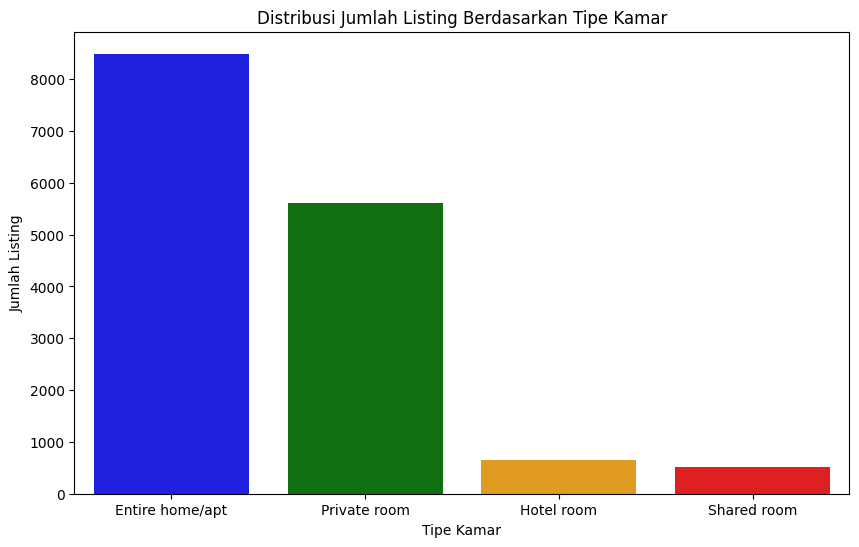

In [ ]:
# Hitung jumlah kemunculan setiap tipe kamar
room_type_counts = data_clean['room_type'].value_counts().reset_index()
room_type_counts.columns = ['room_type', 'count']

# Create a bar plot of room type counts
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='count', data=room_type_counts, palette=['blue', 'green', 'orange', 'red'])
plt.title('Distribusi Jumlah Listing Berdasarkan Tipe Kamar')
plt.xlabel('Tipe Kamar')
plt.ylabel('Jumlah Listing')
plt.show()

Analisa:

Bar plot ini menunjukkan jumlah total listing untuk setiap tipe kamar yang tersedia di dataset Airbnb Bangkok. Dari plot tersebut, dapat diamati dengan jelas bahwa:

+ Dominasi Akomodasi Privat: Tipe kamar 'Entire home/apt' dan 'Private room' memiliki jumlah listing yang jauh lebih tinggi dibandingkan dengan 'Hotel room' dan 'Shared room'. Ini mengkonfirmasi temuan sebelumnya dari analisis distribusi per zona kota, bahwa akomodasi privat mendominasi pasar Airbnb di Bangkok.
  + 'Entire home/apt' memiliki jumlah listing terbanyak, menunjukkan bahwa banyak host di Bangkok menawarkan seluruh unit rumah atau apartemen mereka untuk disewakan.
  + 'Private room' berada di posisi kedua, menunjukkan bahwa menyewakan kamar pribadi di dalam properti yang ditempati host atau properti lainnya juga merupakan opsi yang populer.
+ Proporsi Kecil untuk Hotel dan Shared Room: Tipe 'Hotel room' dan 'Shared room' memiliki jumlah listing yang relatif sangat kecil.
  + Jumlah listing untuk 'Hotel room' menunjukkan bahwa integrasi hotel tradisional ke platform Airbnb di Bangkok masih terbatas dibandingkan dengan akomodasi berbasis komunitas.
  + Jumlah listing 'Shared room' yang paling sedikit menunjukkan bahwa konsep berbagi kamar dengan orang asing kurang populer di pasar Airbnb Bangkok dibandingkan opsi privat.
  
Kesimpulan:

Distribusi tipe kamar di Bangkok secara kuat menunjukkan preferensi pasar untuk akomodasi privat. Mayoritas listing tersedia dalam bentuk seluruh rumah/apartemen atau kamar pribadi. Hal ini mencerminkan jenis penawaran yang paling banyak disediakan oleh host dan mungkin juga mencerminkan preferensi utama wisatawan yang menggunakan Airbnb di Bangkok. Bagi Airbnb, ini berarti strategi akuisisi host dan pemasaran mungkin perlu fokus pada penguatan segmen akomodasi privat, sambil tetap mengevaluasi potensi pertumbuhan atau ceruk pasar untuk 'Hotel room' dan 'Shared room' jika ada permintaan yang teridentifikasi.

Distribusi Ketersediaan Listing Sepanjang Tahun (availability_365)

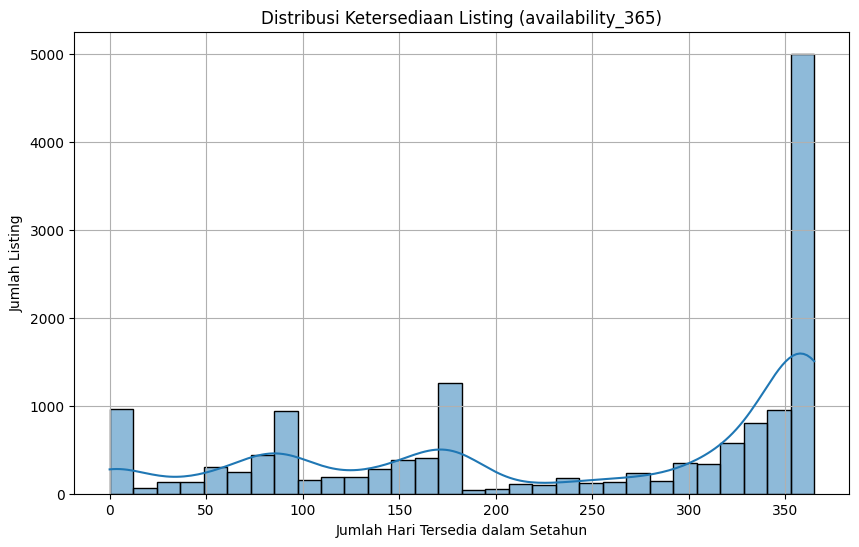


Statistik Deskriptif untuk availability_365:


count    15253.000000
mean       242.595358
std        125.981664
min          0.000000
25%        135.000000
50%        306.000000
75%        360.000000
max        365.000000
Name: availability_365, dtype: float64

In [ ]:
# Visualisasi distribusi availability_365
plt.figure(figsize=(10, 6))
sns.histplot(data=data_clean, x='availability_365', bins=30, kde=True)
plt.title('Distribusi Ketersediaan Listing (availability_365)')
plt.xlabel('Jumlah Hari Tersedia dalam Setahun')
plt.ylabel('Jumlah Listing')
plt.grid(True)
plt.show()

# Statistik deskriptif untuk availability_365
print("\nStatistik Deskriptif untuk availability_365:")
display(data_clean['availability_365'].describe())

Analisis Histogram:

Histogram ini menunjukkan sebaran jumlah hari ketersediaan listing dalam setahun (availability_365). Beberapa pengamatan kunci dari histogram:

+ Puncak di Ujung Kanan: Terdapat puncak yang sangat tinggi di sekitar nilai 365 hari. Ini menunjukkan bahwa sebagian besar listing tersedia hampir sepanjang tahun. Hal ini bisa jadi karena banyak properti yang dikelola secara profesional atau memang ditujukan untuk disewakan jangka pendek secara konsisten.
+ Puncak di Ujung Kiri (Sekitar 0): Ada juga puncak yang lebih kecil di sekitar nilai 0 hari. Ini bisa mewakili listing yang saat ini tidak tersedia, mungkin karena sedang ditempati, dalam renovasi, atau host sedang tidak aktif.
+ Distribusi yang Tidak Merata: Distribusi ketersediaan tidak merata. Selain puncak di 0 dan 365, ada beberapa puncak yang lebih kecil di antara nilai-nilai tersebut, menunjukkan bahwa ada juga listing dengan ketersediaan parsial dalam setahun.

Analisis Statistik Deskriptif:

+ Count: Terdapat 15253 listing dalam analisis ini.
+ Mean (Rata-rata): Rata-rata ketersediaan adalah sekitar 242.6 hari. Angka ini cukup tinggi, mendukung pengamatan dari histogram bahwa banyak listing tersedia untuk sebagian besar tahun.
+ Std (Standar Deviasi): Standar deviasi sekitar 126 hari menunjukkan variasi yang cukup besar dalam ketersediaan antar listing.
+ Min (Minimum): Nilai minimum adalah 0 hari, yang sesuai dengan listing yang tidak tersedia sama sekali.
+ 25% (Kuartil Pertama): 25% listing memiliki ketersediaan 135 hari atau kurang.
+ 50% (Median): Median ketersediaan adalah 306 hari. Ini menunjukkan bahwa setidaknya separuh dari listing tersedia selama 306 hari atau lebih dalam setahun, memperkuat temuan bahwa banyak listing memiliki ketersediaan tinggi.
+ 75% (Kuartil Ketiga): 75% listing memiliki ketersediaan 360 hari atau kurang.
+ Max (Maksimum): Nilai maksimum adalah 365 hari, menunjukkan ketersediaan penuh sepanjang tahun.

Kesimpulan:

Secara keseluruhan, availability_365/ketersediaan sepanjang tahun menunjukkan bahwa mayoritas listing Airbnb di Bangkok memiliki ketersediaan yang tinggi, dengan banyak yang tersedia hampir sepanjang tahun. Namun, terdapat juga sebagian listing yang memiliki ketersediaan terbatas atau tidak tersedia sama sekali. Distribusi ini mencerminkan campuran model bisnis host, mulai dari yang menyewakan properti mereka secara penuh waktu hingga yang hanya menyewakan pada waktu-waktu tertentu. Bagi Airbnb, tingginya ketersediaan listing ini merupakan hal positif karena menawarkan banyak pilihan bagi wisatawan.



Top 10 Neighbourhood dengan Jumlah Airbnb Listing Tertinggi

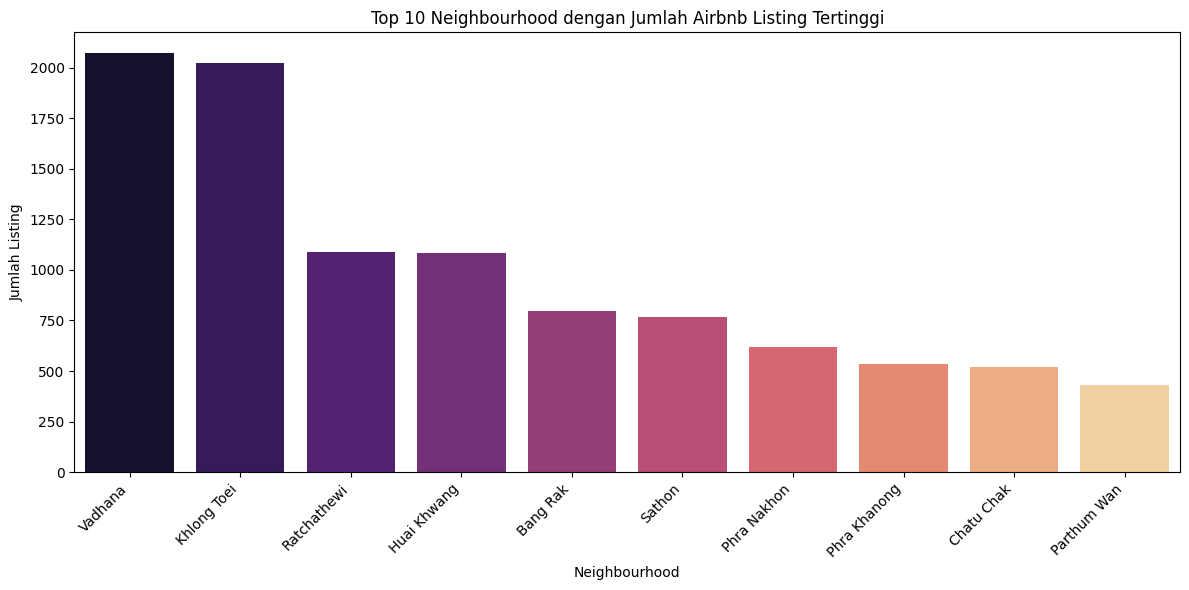

In [ ]:
# Hitung jumlah listing per neighbourhood
neighbourhood_counts = data_clean['neighbourhood'].value_counts().reset_index()
neighbourhood_counts.columns = ['neighbourhood', 'listing_count']

# Ambil 10 neighbourhood teratas
top_10_neighbourhoods = neighbourhood_counts.head(10)

# Buat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='neighbourhood', y='listing_count', data=top_10_neighbourhoods, palette='magma')
plt.title('Top 10 Neighbourhood dengan Jumlah Airbnb Listing Tertinggi')
plt.xlabel('Neighbourhood')
plt.ylabel('Jumlah Listing')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Analisis Hasil Output:**

Bar plot dengan jelas menunjukkan bahwa beberapa neighbourhood memiliki jumlah listing Airbnb yang jauh lebih tinggi dibandingkan yang lain. neighbourhood teratas dalam daftar ini adalah:

1. Vadhana
2. Khlong Toei
3. Ratchathewi
4. Huai Khwang
5. Bang Rak
6. Sathon
7. Phra Nakhon
8. Phra Khanong
9. Chatu Chak
10. Parthum Wan

Terlihat konsentrasi listing yang sangat tinggi di beberapa area ini, dengan Vadhana dan Khlong Toei memimpin jauh di atas neighbourhood lainnya.

**Faktor Pendukung Konsentrasi Listing di Neighbourhood Teratas:**

Konsentrasi listing Airbnb yang tinggi di neighbourhood ini didukung oleh beberapa faktor utama, yang sebagian besar berkaitan dengan daya tarik dan aksesibilitas area tersebut bagi wisatawan:

1. Lokasi Strategis (Inner City Dominance): Sebagian besar neighbourhood dalam daftar 10 teratas (Vadhana, Khlong Toei, Ratchathewi, Huai Khwang, Bang Rak, Sathon, Phra Nakhon, Phaya Thai (dekat dengan Ratchathewi/Huai Khwang), Parthum Wan) berada dalam kategori "Inner City" atau sangat dekat dengan pusat kota Bangkok. Area-area ini merupakan pusat bisnis, perbelanjaan, hiburan, dan atraksi wisata utama (seperti Siam, Sukhumvit, Silom, area Grand Palace/Wat Arun di Phra Nakhon). Kedekatan dengan pusat aktivitas sangat diminati wisatawan.
2. Akses Transportasi Publik yang Sangat Baik: Neighbourhood seperti Vadhana (Sukhumvit), Khlong Toei, Ratchathewi, Huai Khwang, Bang Rak (Silom), Sathon, Phaya Thai, Chatu Chak, dan Parthum Wan dilayani dengan sangat baik oleh sistem Skytrain (BTS) dan/atau Metro (MRT). Kemudahan akses transportasi publik ini memudahkan wisatawan untuk menjelajahi kota, sehingga meningkatkan daya tarik lokasi-lokasi ini untuk akomodasi.
3. Ketersediaan Properti (Kondominium & Apartemen): Banyak dari area ini merupakan kawasan residensial modern dengan banyak pembangunan kondominium dan apartemen baru maupun lama. Tipe properti ini sangat cocok untuk disewakan sebagai 'Entire home/apt' atau 'Private room', yang merupakan tipe kamar dominan di Airbnb Bangkok.
4. Pusat Bisnis dan Komersial: Selain turisme, beberapa area ini juga merupakan pusat bisnis dan komersial (misalnya Sathon, Bang Rak, sebagian Khlong Toei dan Vadhana). Hal ini menarik pelancong bisnis yang mencari akomodasi alternatif selain hotel tradisional.
5. Atraksi Wisata Spesifik: Neighbourhood seperti Chatu Chak terkenal dengan pasar akhir pekannya, Phra Nakhon adalah rumah bagi situs-situs bersejarah utama, dan Parthum Wan adalah pusat perbelanjaan utama. Atraksi spesifik ini menarik banyak pengunjung dan menciptakan permintaan akomodasi di sekitarnya.
6. Popularitas dan Reputasi: Neighbourhood ini sudah memiliki reputasi yang mapan sebagai area populer di kalangan turis dan ekspat, yang secara alami mendorong permintaan untuk opsi akomodasi jangka pendek seperti Airbnb.

**Kesimpulan:**

Konsentrasi listing Airbnb di neighbourhood teratas mencerminkan pola permintaan wisatawan yang kuat terhadap lokasi yang sentral, mudah diakses, dan dekat dengan atraksi utama serta fasilitas modern. Ini mengkonfirmasi bahwa strategi Airbnb di Bangkok sangat berfokus pada area-area yang sudah mapan sebagai destinasi wisata populer.

# Insight dan Kesimpulan

Berdasarkan analisis eksplorasi data (EDA) yang telah dilakukan terhadap dataset Airbnb Listing di Bangkok, berikut adalah insight dan kesimpulan utama yang relevan dengan rumusan masalah, tujuan analisis, dan kebutuhan stakeholder:

## Menjawab Rumusan Masalah

1.  **Peta Distribusi Listing Airbnb di Bangkok Berdasarkan Zona Kota dan Neighbourhood:**
    *   Distribusi listing Airbnb di Bangkok sangat terkonsentrasi di **Inner City (77.68%)**, diikuti oleh **Middle City (18.17%)**, dan sangat sedikit di **Outer City (4.15%)**.
    *   Secara neighbourhood, **Vadhana dan Khlong Toei** memiliki jumlah listing tertinggi secara signifikan, diikuti oleh area Inner City lainnya seperti Ratchathewi, Huai Khwang, Bang Rak, dan Sathon.
    *   Ini menunjukkan bahwa supply Airbnb saat ini sangat terpusat di area-area yang sudah mapan sebagai pusat turisme dan bisnis dengan akses transportasi yang baik.

2.  **Distribusi Listing Berdasarkan Tipe Room dan Preferensi Antar Zona Kota:**
    *   Secara keseluruhan, tipe kamar **'Entire home/apt' dan 'Private room' mendominasi** jumlah listing di Bangkok.
    *   Dominasi akomodasi privat ini konsisten di **Inner City dan Middle City**, meskipun dengan proporsi yang sedikit berbeda. 'Entire home/apt' sedikit lebih unggul di Inner City, sementara 'Private room' juga sangat signifikan di kedua zona ini.
    *   Di **Outer City**, meskipun jumlah total listing kecil, 'Private room' sedikit lebih banyak dibandingkan 'Entire home/apt'.
    *   'Hotel room' dan 'Shared room' memiliki proporsi listing yang sangat kecil di semua zona.

3.  **Room_type yang Mendominasi Jumlah Review (Indikasi Permintaan Tinggi):**
    *   Jumlah review secara kumulatif didominasi oleh listing di **Inner City**.
    *   Di semua zona, tipe kamar **'Entire home/apt' dan 'Private room' menerima jumlah review yang jauh lebih tinggi** dibandingkan 'Hotel room' dan 'Shared room'. Ini menunjukkan bahwa akomodasi privat cenderung lebih populer dan/atau lebih sering mendapatkan feedback dari tamu.
    *   'Entire home/apt' di Inner City memiliki jumlah review tertinggi, mengindikasikan permintaan yang sangat tinggi untuk tipe akomodasi ini di pusat kota.

4.  **Area dengan Potensi Pertumbuhan (Oversupply dan Opportunity):**
    *   Berdasarkan analisis jumlah listing vs. rata-rata review per neighbourhood menggunakan threshold kuartil, tidak ada area yang secara ekstrem masuk dalam kategori oversupply (banyak listing, sangat sedikit review) atau opportunity (sedikit listing, sangat banyak review).
    *   Hal ini bisa mengindikasikan bahwa distribusi supply dan demand (berdasarkan review) cenderung lebih seimbang dari yang diperkirakan, atau threshold yang digunakan perlu disesuaikan.
    *   Meskipun demikian, secara visual pada scatter plot, area dengan jumlah listing lebih rendah namun rata-rata review yang relatif baik bisa menjadi target eksplorasi lebih lanjut untuk potensi opportunity.

## Relevansi dengan Tujuan Analisis

Analisis ini berhasil:
*   Memberikan gambaran distribusi listing berdasarkan zona kota dan neighbourhood melalui peta dan pie chart.
*   Mengidentifikasi preferensi tipe room dan perbedaannya antar zona melalui analisis distribusi tipe kamar.
*   Menilai tingkat permintaan berdasarkan jumlah review per room_type dan area melalui analisis jumlah review.
*   Menemukan potensi wilayah oversupply/opportunity meskipun tidak ada yang ekstrem berdasarkan kriteria awal, namun membuka ruang untuk analisis yang lebih mendalam.
*   Hasil analisis ini secara langsung mendukung tujuan untuk memberikan wawasan berbasis data bagi tim internal Airbnb.

## Wawasan untuk Stakeholder

Hasil analisis ini memberikan wawasan penting bagi stakeholder Airbnb:

*   **Airbnb Business Development & Expansion:**
    *   **Prioritas Akuisisi Host Baru:** Fokus akuisisi host baru sebaiknya tetap di **Middle City** yang menunjukkan potensi pertumbuhan (jumlah listing moderat, masih dekat pusat) dan area-area spesifik di **Outer City** yang mungkin memiliki ceruk pasar ('Private room' menunjukkan potensi relatif di sana). Strategi di Inner City lebih ke diferensiasi kualitas daripada penambahan kuantitas listing secara masif.
    *   **Tipe Properti:** Dorong akuisisi host yang menawarkan tipe **'Entire home/apt' dan 'Private room'** di area Middle dan Outer City, mengingat preferensi pasar yang kuat terhadap akomodasi privat.

*   **Airbnb Marketing Strategy Team:**
    *   **Kampanye di Inner City:** Strategi pemasaran di Inner City yang padat listing harus menekankan pada **keunikan, pengalaman lokal, dan keunggulan listing tertentu** (misalnya, listing dengan review tinggi, fasilitas premium, atau desain menarik) untuk membantu host menonjol di tengah kompetisi.
    *   **Kampanye di Middle & Outer City:** Promosikan Middle City sebagai alternatif yang lebih terjangkau namun tetap nyaman dengan akses ke pusat kota. Untuk Outer City, targetkan segmen wisatawan spesifik yang mungkin tertarik (misalnya, pelancong bisnis dekat bandara, atau yang mencari pengalaman lokal otentik di area pinggiran) dan sorot keunggulan akomodasi privat di sana.

*   **Airbnb Product & Data Strategy Team:**
    *   **Rekomendasi Host/Listing:** Kembangkan fitur rekomendasi yang tidak hanya berdasarkan lokasi, tetapi juga tipe kamar dan performa (jumlah review, rating). Di Inner City, fokus pada rekomendasi listing dengan review tinggi dan ketersediaan yang konsisten.
    *   **Dynamic Pricing:** Analisis ketersediaan (`availability_365`) dan pola review dapat digunakan untuk membantu host di Inner City yang kompetitif menentukan harga yang optimal.
    *   **Optimasi Lokasi:** Data distribusi listing dan review dapat diintegrasikan ke dalam algoritma platform untuk mengoptimalkan visibilitas listing, terutama di area Middle dan Outer City yang memiliki potensi namun supply masih terbatas.

**Kesimpulan Akhir:**

Pasar Airbnb di Bangkok sangat dinamis dan didominasi oleh akomodasi privat di pusat kota. Meskipun tidak ada area oversupply atau opportunity yang ekstrem teridentifikasi dengan threshold awal, analisis ini memberikan dasar yang kuat untuk strategi ekspansi dan pemasaran yang lebih terarah, dengan potensi pertumbuhan yang menarik di area Middle dan Outer City, serta kebutuhan untuk diferensiasi kualitas di Inner City yang kompetitif. Langkah selanjutnya dapat mencakup penyesuaian parameter analisis, analisis faktor lain, dan integrasi insight ini ke dalam operasional bisnis Airbnb.

# Business Recommendation

Berdasarkan insight yang diperoleh dari analisis data Airbnb Listing di Bangkok, berikut adalah beberapa rekomendasi bisnis yang dapat dipertimbangkan oleh tim internal Airbnb:

1.  **Strategi Akuisisi Host yang Bertarget:**
    *   **Fokus pada Middle City dan Outer City:** Alihkan sebagian fokus akuisisi host baru ke area Middle City dan neighbourhood potensial di Outer City. Gunakan data rata-rata review per listing di area-area ini untuk mengidentifikasi neighbourhood dengan permintaan yang relatif baik namun supply masih rendah.
    *   **Target Tipe Properti Privat:** Dalam kampanye akuisisi, prioritaskan tipe properti 'Entire home/apt' dan 'Private room', karena data menunjukkan preferensi pasar yang kuat terhadap akomodasi privat.
    *   **Program Insentif:** Tawarkan insentif khusus bagi host baru di area Middle dan Outer City untuk mempercepat pertumbuhan supply di zona-zona ini.

2.  **Optimalisasi Marketing & Promosi:**
    *   **Diferensiasi Kualitas di Inner City:** Di Inner City yang kompetitif, kampanye pemasaran harus menekankan Unique Selling Points (USP) listing, seperti fasilitas premium, pengalaman lokal unik, atau rating dan review yang sangat baik. Dorong host untuk meningkatkan kualitas foto dan deskripsi listing mereka.
    *   **Promosi Alternatif di Middle & Outer City:** Pasarkan Middle City sebagai opsi "Best Value" atau "Local Experience" yang menawarkan kenyamanan dan aksesibilitas dengan harga lebih terjangkau. Untuk Outer City, identifikasi dan targetkan segmen wisatawan yang relevan (misalnya, transit traveler, long-stay guest, atau yang mencari ketenangan).
    *   **Highlight Review Positif:** Manfaatkan review positif dari tamu sebagai bukti sosial dalam materi pemasaran, terutama untuk listing dan area yang ingin ditingkatkan visibilitasnya.

3.  **Pengembangan Fitur Platform:**
    *   **Algoritma Rekomendasi yang Canggih:** Perbaiki algoritma rekomendasi listing agar tidak hanya berdasarkan lokasi, tetapi juga mempertimbangkan tipe kamar yang diminati di area tersebut dan metrik performa listing (review, rating, ketersediaan).
    *   **Alat Bantu Host:** Sediakan alat bantu bagi host, seperti rekomendasi harga dinamis berdasarkan ketersediaan dan permintaan di area mereka, serta panduan untuk meningkatkan kualitas listing (misalnya, tips fotografi, cara merespon review).
    *   **Fitur Pencarian Berbasis Pengalaman:** Kembangkan fitur pencarian yang memungkinkan pengguna mencari berdasarkan "pengalaman" atau "gaya menginap" (misalnya, "cocok untuk long-stay", "dekat transportasi publik", "pemandangan indah") yang dapat membantu wisatawan menemukan listing yang sesuai di berbagai zona kota.

4.  **Analisis dan Monitoring Berkelanjutan:**
    *   **Pantau Tren Supply & Demand:** Lakukan analisis rutin terhadap tren jumlah listing, review, tingkat okupansi, dan harga di setiap neighbourhood dan zona kota untuk mengidentifikasi pergeseran pasar dan potensi baru.
    *   **Survei Host & Tamu:** Lakukan survei kualitatif terhadap host di area Middle dan Outer City untuk memahami tantangan dan peluang mereka, serta survei tamu mengenai preferensi mereka di berbagai zona kota.
    *   **Analisis Kompetitor:** Pantau aktivitas kompetitor (hotel, properti sewaan jangka panjang, platform lain) di berbagai area untuk menyesuaikan strategi Airbnb.

Dengan menerapkan rekomendasi ini, Airbnb dapat secara lebih efektif memanfaatkan momentum kebangkitan pariwisata Bangkok di tahun 2025, mengoptimalkan strategi ekspansi, meningkatkan daya saing, dan memberikan pengalaman yang lebih baik bagi host maupun tamu di seluruh area Bangkok.

Link Tableau : https://public.tableau.com/app/profile/christian.richardo/viz/Christian_Capstone2_Airbnb/Dashboard2?publish=yes&showOnboarding=true
